__Logistic Regression__ is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

# Logistic Regression Assumptions

 1. Binary logistic regression requires the dependent variable to be binary.
    
 2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
 
 3. Only the meaningful variables should be included.

 4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.

 5. The independent variables are linearly related to the log odds.

 6. Logistic regression requires quite large sample sizes.

Keeping the above assumptions in mind, let’s look at our dataset.

# Data

The dataset comes from the The Spotify Hit Predictor Dataset (1960-2019) of Kaggle, and it is consisting of features for tracks fetched using Spotify's Web API. The dataset starting from Jan 1st, 2010, ending at Dec 31st, 2019. There might be some songs from the 50s, too. The classification goal is to predict whether the track will would be a 'Hit' (1) or not (0) (variable y).

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

The dataset includes 6398 records and 19 fields.

In [2]:
data = pd.read_csv('dataset-of-10s.csv')
print(data.shape)
print(data.columns)

(6398, 19)
Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')


In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 19 columns):
track               6398 non-null object
artist              6398 non-null object
uri                 6398 non-null object
danceability        6398 non-null float64
energy              6398 non-null float64
key                 6398 non-null int64
loudness            6398 non-null float64
mode                6398 non-null int64
speechiness         6398 non-null float64
acousticness        6398 non-null float64
instrumentalness    6398 non-null float64
liveness            6398 non-null float64
valence             6398 non-null float64
tempo               6398 non-null float64
duration_ms         6398 non-null int64
time_signature      6398 non-null int64
chorus_hit          6398 non-null float64
sections            6398 non-null int64
target              6398 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 949.8+ KB


### Input variables

 1. track: The Name of the track — (categorial)
 2. artist: The Name of the first artist listed for the track — (categorial)
 3. uri: The resource identifier for the track — (categorial)
 4. danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements —(numeric).
 5. energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks — (numeric).
 6. key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, — (numeric).
 7. loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful — (numeric).
 8. mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is — (numeric).
 9. speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book — (numeric).
 10. acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is — (numeric).
 11. instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. — (numeric).
 12. liveness: Detects the presence of an audience in the recording — (numeric). 
 13. valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. — (numeric). 
 14. tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed — (numeric). 
 15. duration_ms: The duration of the track in milliseconds — (numeric). 
 16. time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats —(numeric).
 17. chorus_hit: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third —(numeric).
 18. sections: The number of sections the particular track has. This feature was extracted from the data recieved by the API call — (numeric)
 

### Predict variable (desired target):

target — whether the track is a hit or not? (binary: “1”, means “Yes”, “0” means “No”)

In [5]:
data['track'].unique()
print(len(data['track'].unique()))

5966


In [6]:
print(data['artist'].unique())
print(len(data['artist'].unique()))

['Alessia Cara' 'Esquivel!' 'Lukas Graham' ... 'Regentum'
 'Liam Payne Featuring Quavo' 'The Neighbourhood']
3355


In [7]:
print(data['uri'].unique())
print(len(data['uri'].unique()))

['spotify:track:2ZyuwVvV6Z3XJaXIFbspeE'
 'spotify:track:61APOtq25SCMuK0V5w2Kgp'
 'spotify:track:2JqnpexlO9dmvjUMCaLCLJ' ...
 'spotify:track:55qBw1900pZKfXJ6Q9A2Lc'
 'spotify:track:4o9npmYHrOF1rUxxTVH8h4'
 'spotify:track:2khIaVUkbMmDHB596lyMG3']
6378


# Data exploration

In [8]:
data['target'].value_counts()

1    3199
0    3199
Name: target, dtype: int64

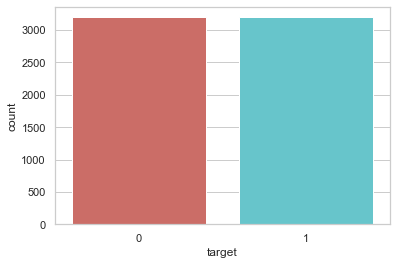

<Figure size 432x288 with 0 Axes>

In [9]:
sns.countplot(x='target', data=data, palette= 'hls')
plt.show()
plt.savefig('count_plot')

In [10]:
count_no_hit = len(data[data['target']==0])
count_hit = len(data[data['target']==1])
pct_of_no_hit = count_no_hit/(count_no_hit+count_hit)
print("\033[1m percentage of no hit is", pct_of_no_hit*100)
pct_of_hit = count_hit/(count_no_hit+count_hit)
print("\033[1m percentage of hit", pct_of_hit*100)

 percentage of no hit is 50.0
 percentage of hit 50.0


Our classes are imbalanced, and the ratio of no-hit to hit instances is 50:50. Let’s do some more exploration.

In [11]:
data.groupby('target').mean()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
target,,,,,,,,,,,,,,,
0,0.494692,0.653146,5.263520,-9.303840,0.630197,0.088512,0.271684,0.324528,0.207102,0.393656,121.183166,252905.756486,3.882776,42.703110,10.744608
1,0.641633,0.682367,5.303532,-5.875753,0.660832,0.107524,0.162173,0.006057,0.186298,0.493813,123.524576,220502.664270,3.979056,39.353687,9.888403


# Observations:
 1. The average danceability level of hits is higher than that of non-hits.
 2. The average energy level of hits is higher than that of non-hits.
 3. The average key level of hits is a bit lower than that of non-hits.
 4. The average loudness level of hits is lower than that of non-hits.
 5. The average mode level of hits is higher than that of non-hits.
 6. The average speechiness level of hits is a bit lower than that of non-hits.
 7. The average acousticness level of hits is a bit lower than that of non-hits.
 8. The average instrumentalness level of hits is lower than that of non-hits.
 9. The average liveness level of hits is a bit lower than that of non-hits.
 10. The average valence level of hits is higher than that of non-hits.
 11. The average tempo level of hits is higher than that of non-hits.
 12. The average duration_ms level of hits is lower than that of non-hits.
 13. The average time_signature level of hits is higher than that of non-hits.
 14. The average chorus_hit level of hits is a bit lower than that of non-hits.
 15. The average sections level of hits is a bit lower than that of non-hits.


# Visualizations

## 1. danceability

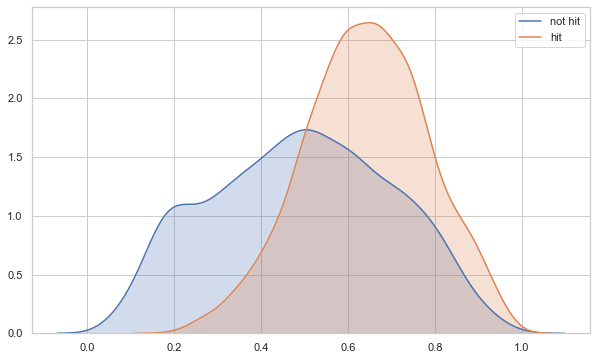

In [12]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data['danceability'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['danceability'].loc[data['target'] == 1], label='hit', shade=True);

In [13]:
data['danceability'].loc[data['target'] == 0].describe()

count    3199.000000
mean        0.494692
std         0.204851
min         0.062200
25%         0.335000
50%         0.499000
75%         0.651000
max         0.969000
Name: danceability, dtype: float64

In [14]:
data['danceability'].loc[data['target'] == 1].describe()

count    3199.000000
mean        0.641633
std         0.142438
min         0.201000
25%         0.547000
50%         0.645000
75%         0.741000
max         0.981000
Name: danceability, dtype: float64

## 2. energy

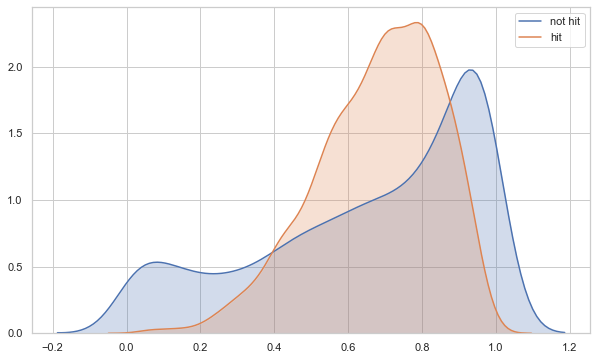

In [15]:
sns.kdeplot(data['energy'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['energy'].loc[data['target'] == 1], label='hit', shade=True);

In [16]:
data['energy'].loc[data['target'] == 0].describe()

count    3199.000000
mean        0.653146
std         0.296280
min         0.000251
25%         0.454000
50%         0.731000
75%         0.916000
max         0.999000
Name: energy, dtype: float64

In [17]:
data['energy'].loc[data['target'] == 1].describe()

count    3199.000000
mean        0.682367
std         0.166443
min         0.056100
25%         0.573000
50%         0.704000
75%         0.809000
max         0.991000
Name: energy, dtype: float64

## 3. key

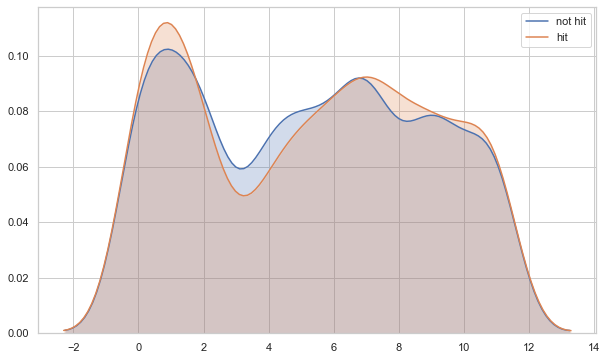

In [18]:
sns.kdeplot(data['key'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['key'].loc[data['target'] == 1], label='hit', shade=True);

In [19]:
data['key'].loc[data['target'] == 0].describe()

count    3199.000000
mean        5.263520
std         3.577029
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64

In [20]:
data['key'].loc[data['target'] == 1].describe()

count    3199.000000
mean        5.303532
std         3.635618
min         0.000000
25%         2.000000
50%         6.000000
75%         8.000000
max        11.000000
Name: key, dtype: float64

## 4. loudness

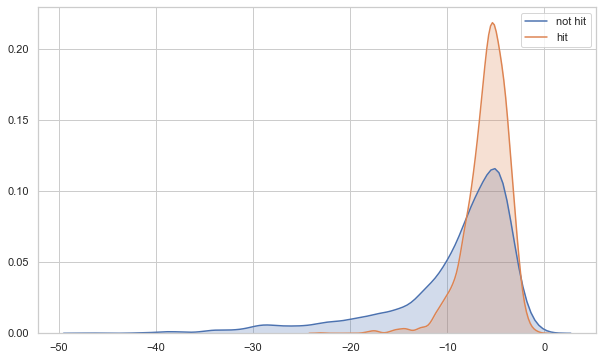

In [21]:
sns.kdeplot(data['loudness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['loudness'].loc[data['target'] == 1], label='hit', shade=True);

In [22]:
data['loudness'].loc[data['target'] == 0].describe()

count    3199.000000
mean       -9.303840
std         6.639234
min       -46.655000
25%       -11.079500
50%        -7.178000
75%        -4.936500
max        -0.149000
Name: loudness, dtype: float64

In [23]:
data['loudness'].loc[data['target'] == 1].describe()

count    3199.000000
mean       -5.875753
std         2.203026
min       -23.023000
25%        -6.972000
50%        -5.567000
75%        -4.389000
max        -0.716000
Name: loudness, dtype: float64

## 5. mode

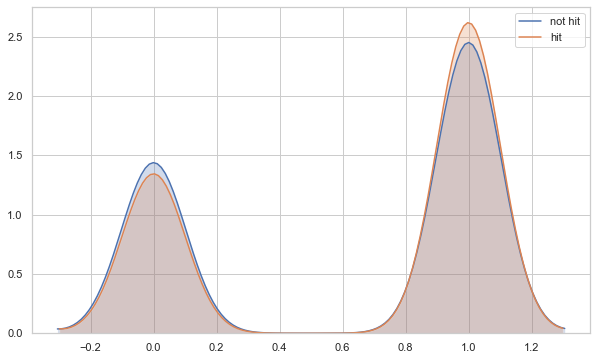

In [24]:
sns.kdeplot(data['mode'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['mode'].loc[data['target'] == 1], label='hit', shade=True);

In [25]:
data['mode'].loc[data['target'] == 0].describe()

count    3199.000000
mean        0.630197
std         0.482827
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

In [26]:
data['mode'].loc[data['target'] == 1].describe()

count    3199.000000
mean        0.660832
std         0.473501
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: mode, dtype: float64

## 6. speechiness

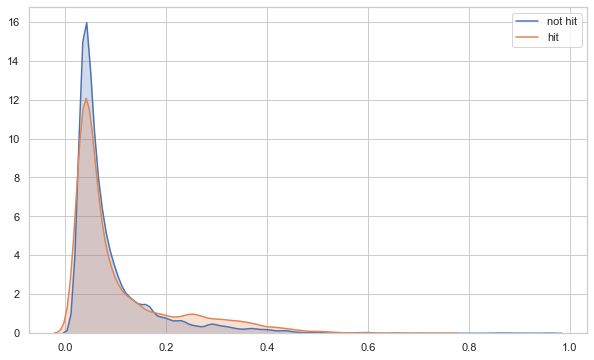

In [27]:
sns.kdeplot(data['speechiness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['speechiness'].loc[data['target'] == 1], label='hit', shade=True);

In [28]:
data['speechiness'].loc[data['target'] == 0].describe()

count    3199.000000
mean        0.088512
std         0.086118
min         0.023600
25%         0.039200
50%         0.056100
75%         0.098800
max         0.956000
Name: speechiness, dtype: float64

In [29]:
data['speechiness'].loc[data['target'] == 1].describe()

count    3199.000000
mean        0.107524
std         0.106353
min         0.022500
25%         0.038300
50%         0.058600
75%         0.132500
max         0.733000
Name: speechiness, dtype: float64

## 7. acousticness

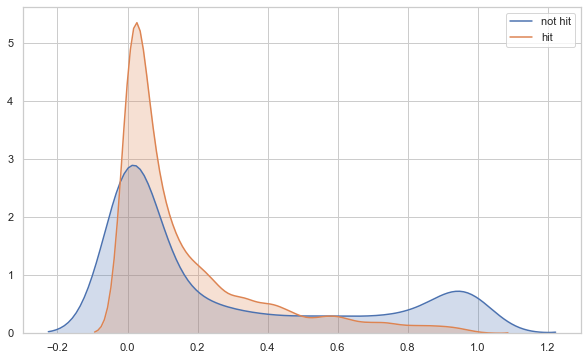

In [30]:
sns.kdeplot(data['acousticness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['acousticness'].loc[data['target'] == 1], label='hit', shade=True);

In [31]:
data['acousticness'].loc[data['target'] == 0].describe()

count    3199.000000
mean        0.271684
std         0.357485
min         0.000000
25%         0.001090
50%         0.051900
75%         0.528000
max         0.996000
Name: acousticness, dtype: float64

In [32]:
data['acousticness'].loc[data['target'] == 1].describe()

count    3199.000000
mean        0.162173
std         0.206048
min         0.000025
25%         0.020550
50%         0.073600
75%         0.221000
max         0.992000
Name: acousticness, dtype: float64

## 8. instrumentalness

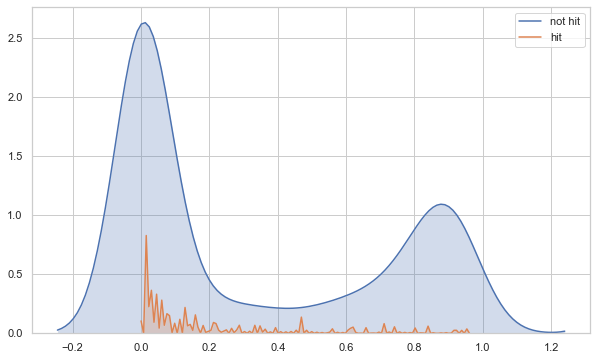

In [33]:
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['instrumentalness'].loc[data['target'] == 1], label='hit', shade=True);

In [34]:
data['instrumentalness'].loc[data['target'] == 0].describe()

count    3199.000000
mean        0.324528
std         0.387085
min         0.000000
25%         0.000036
50%         0.038500
75%         0.786000
max         0.995000
Name: instrumentalness, dtype: float64

In [35]:
data['instrumentalness'].loc[data['target'] == 1].describe()

count    3199.000000
mean        0.006057
std         0.051523
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000011
max         0.961000
Name: instrumentalness, dtype: float64

## 9. liveness

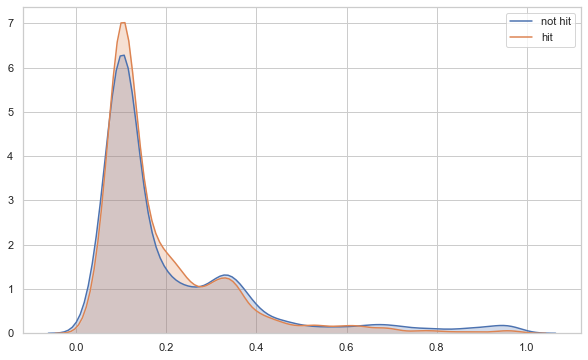

In [36]:
sns.kdeplot(data['liveness'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['liveness'].loc[data['target'] == 1], label='hit', shade=True);

In [37]:
data['liveness'].loc[data['target'] == 0].describe()

count    3199.000000
mean        0.207102
std         0.184389
min         0.019900
25%         0.096500
50%         0.124000
75%         0.271000
max         0.982000
Name: liveness, dtype: float64

In [38]:
data['liveness'].loc[data['target'] == 1].describe()

count    3199.000000
mean        0.186298
std         0.144925
min         0.016700
25%         0.097000
50%         0.127000
75%         0.231000
max         0.979000
Name: liveness, dtype: float64

## 10. valence

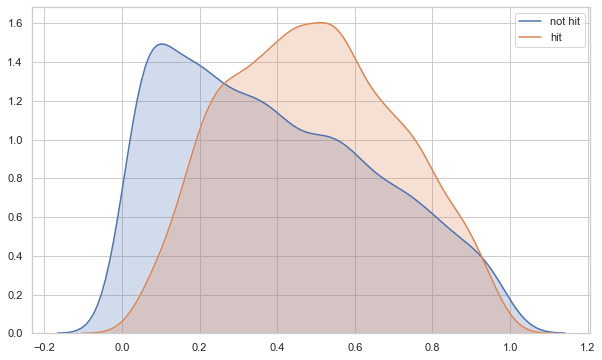

In [39]:
sns.kdeplot(data['valence'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['valence'].loc[data['target'] == 1], label='hit', shade=True);

In [40]:
data['valence'].loc[data['target'] == 0].describe()

count    3199.000000
mean        0.393656
std         0.262710
min         0.000000
25%         0.167000
50%         0.357000
75%         0.594000
max         0.975000
Name: valence, dtype: float64

In [41]:
data['valence'].loc[data['target'] == 1].describe()

count    3199.000000
mean        0.493813
std         0.216325
min         0.035200
25%         0.325000
50%         0.487000
75%         0.654500
max         0.976000
Name: valence, dtype: float64

## 11. tempo

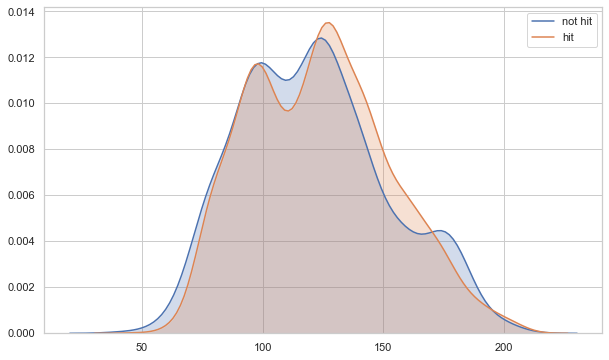

In [42]:
sns.kdeplot(data['tempo'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['tempo'].loc[data['target'] == 1], label='hit', shade=True);

In [43]:
data['tempo'].loc[data['target'] == 0].describe()

count    3199.000000
mean      121.183166
std        30.581700
min        39.369000
25%        97.508000
50%       119.993000
75%       140.009500
max       210.977000
Name: tempo, dtype: float64

In [44]:
data['tempo'].loc[data['target'] == 1].describe()

count    3199.000000
mean      123.524576
std        29.052186
min        48.718000
25%        99.967000
50%       123.815000
75%       142.673000
max       208.067000
Name: tempo, dtype: float64

## 12. duration_ms

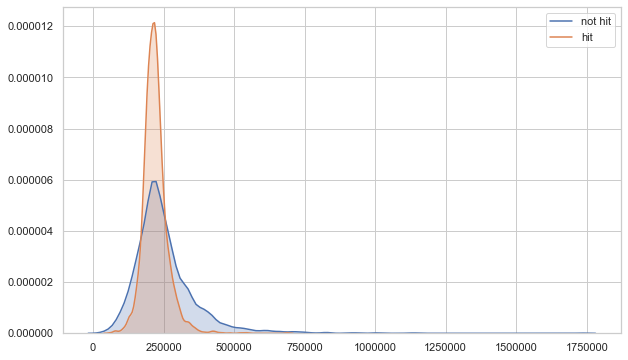

In [45]:
sns.kdeplot(data['duration_ms'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['duration_ms'].loc[data['target'] == 1], label='hit', shade=True);

In [46]:
data['duration_ms'].loc[data['target'] == 0].describe()

count    3.199000e+03
mean     2.529058e+05
std      1.106396e+05
min      2.985300e+04
25%      1.900000e+05
50%      2.307040e+05
75%      2.899545e+05
max      1.734201e+06
Name: duration_ms, dtype: float64

In [47]:
data['duration_ms'].loc[data['target'] == 1].describe()

count      3199.000000
mean     220502.664270
std       43628.031893
min       59387.000000
25%      195125.000000
50%      216573.000000
75%      239673.000000
max      688453.000000
Name: duration_ms, dtype: float64

## 13. time_signature

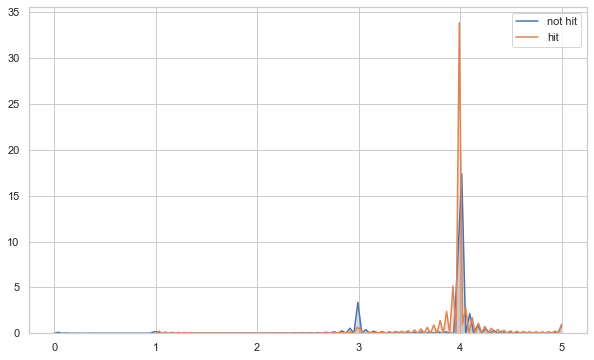

In [48]:
sns.kdeplot(data['time_signature'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['time_signature'].loc[data['target'] == 1], label='hit', shade=True);

In [49]:
data['time_signature'].loc[data['target'] == 0].describe()

count    3199.000000
mean        3.882776
std         0.457390
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

In [50]:
data['time_signature'].loc[data['target'] == 1].describe()

count    3199.000000
mean        3.979056
std         0.266774
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: time_signature, dtype: float64

## 14. chorus_hit

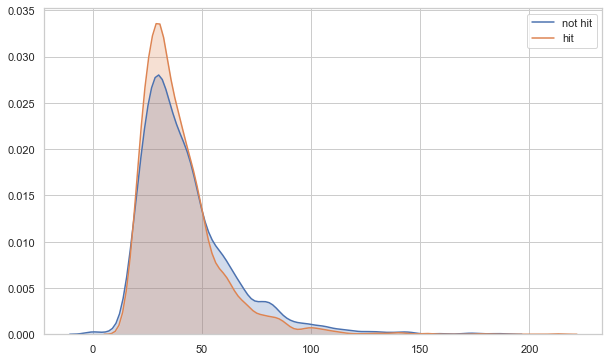

In [51]:
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['chorus_hit'].loc[data['target'] == 1], label='hit', shade=True);

In [52]:
data['chorus_hit'].loc[data['target'] == 0].describe()

count    3199.000000
mean       42.703110
std        21.335656
min         0.000000
25%        28.379785
50%        37.475030
75%        50.938510
max       185.939400
Name: chorus_hit, dtype: float64

In [53]:
data['chorus_hit'].loc[data['target'] == 1].describe()

count    3199.000000
mean       39.353687
std        17.469300
min        13.733290
25%        27.890200
50%        35.158990
75%        46.203670
max       213.154990
Name: chorus_hit, dtype: float64

## 15. sections

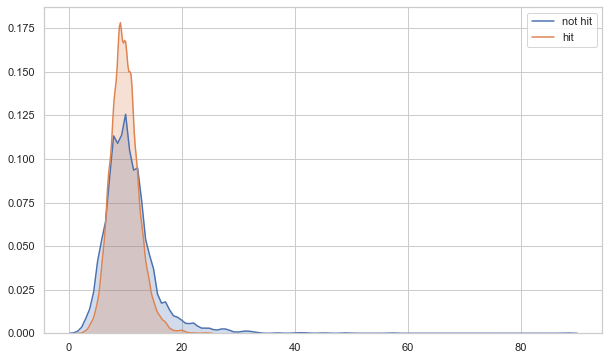

In [54]:
sns.kdeplot(data['sections'].loc[data['target'] == 0], label='not hit', shade=True);
sns.kdeplot(data['sections'].loc[data['target'] == 1], label='hit', shade=True);

In [55]:
data['sections'].loc[data['target'] == 0].describe()

count    3199.000000
mean       10.744608
std         4.698953
min         2.000000
25%         8.000000
50%        10.000000
75%        12.000000
max        88.000000
Name: sections, dtype: float64

In [56]:
data['sections'].loc[data['target'] == 1].describe()

count    3199.000000
mean        9.888403
std         2.464581
min         3.000000
25%         8.000000
50%        10.000000
75%        11.000000
max        24.000000
Name: sections, dtype: float64

Our final data columns will be:

In [57]:
data_final=data.copy()
data_final.columns.values

array(['track', 'artist', 'uri', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'chorus_hit', 'sections', 'target'], dtype=object)

In [58]:
data_final.drop(['track', 'artist', 'uri'], axis=1, inplace=True)

In [59]:
data_final.columns.values

array(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections',
       'target'], dtype=object)

In [60]:
X = data_final.loc[:, data_final.columns != 'target']
y = data_final.loc[:, data_final.columns == 'target']
y=y.astype('int')

# Implementing the model

In [61]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.437638
         Iterations 10
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.369    
Dependent Variable:  target           AIC:              5630.0105
Date:                2020-06-03 00:12 BIC:              5731.4666
No. Observations:    6398             Log-Likelihood:   -2800.0  
Df Model:            14               LL-Null:          -4434.8  
Df Residuals:        6383             LLR p-value:      0.0000   
Converged:           1.0000           Scale:            1.0000   
No. Iterations:      10.0000                                     
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
danceability      3.5832   0.2500  14.3307 0.0000  3.0931  4.0733
energy           -5.0248   0.2963 -16.9562 0.0000 -5.6056 -4.4440

# Logistic Regression Model Fitting

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the test set results and calculating the accuracy

In [63]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.48


### Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[926   0]
 [994   0]]


In [65]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  926 correct predictions.
 The result is telling us that we have:  994 incorrect predictions.
 We have a total predictions of:  1920


### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       926
           1       0.00      0.00      0.00       994

    accuracy                           0.48      1920
   macro avg       0.24      0.50      0.33      1920
weighted avg       0.23      0.48      0.31      1920



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Logistic Regression model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Logistic Regression model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic\nRegression model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Logistic Regression model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Logistic Regression model: 48.23%
Well, you got a classification rate of 48.23%

Precision of Logistic Regression model: 0.00%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic
Regression model predicted a track is a hit, that track was actually a hit 0.00% of
 the time.

Recall of Logistic Regression model: 0.00%
Recall: If there is a track which is a hit the present in the test set, our Logistic Regression model
can identify it 0.00% of the time.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### ROC Curve

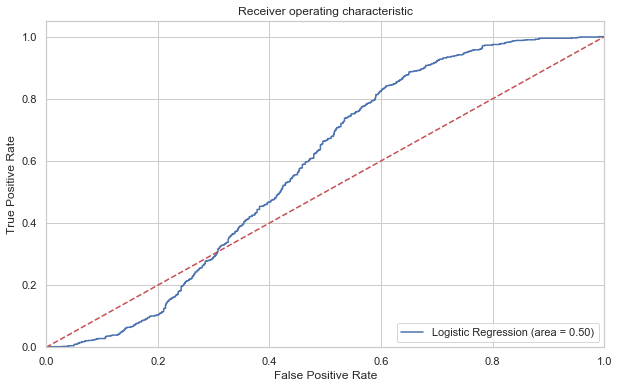

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Random forest Classifier Model Fitting

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predicting the test set results and calculating the accuracy

In [70]:
y_pred = rf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.85


### Confusion Matrix

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[757 169]
 [124 870]]


In [72]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1627 correct predictions.
 The result is telling us that we have:  293 incorrect predictions.
 We have a total predictions of:  1920


### Compute precision, recall, F-measure and support

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       926
           1       0.84      0.88      0.86       994

    accuracy                           0.85      1920
   macro avg       0.85      0.85      0.85      1920
weighted avg       0.85      0.85      0.85      1920



In [74]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Random Forest model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Random Forest model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Random\nForest model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Random Forest model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Random Forest model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Random Forest model: 84.74%
Well, you got a classification rate of 84.74%

Precision of Random Forest model: 83.73%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Random
Forest model predicted a track is a hit, that track was actually a hit 83.73% of
 the time.

Recall of Random Forest model: 87.53%
Recall: If there is a track which is a hit the present in the test set, our Random Forest model
can identify it 87.53% of the time.


### ROC Curve

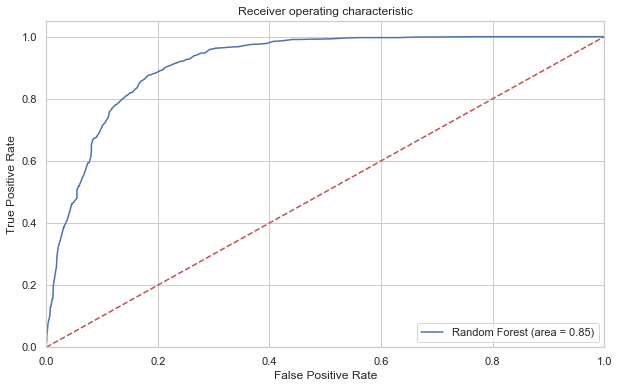

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Gradient boosting Classifier Model Fitting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### Predicting the test set results and calculating the accuracy

In [77]:
y_pred = gb.predict(X_test)
print('Accuracy of gradient boosting classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of gradient boosting classifier on test set: 0.85


### Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[738 188]
 [123 871]]


In [79]:
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,0]+confusion_matrix[1,1]),
      "correct predictions.")
print("\033[1m The result is telling us that we have: ",
      (confusion_matrix[0,1]+confusion_matrix[1,0]),
      "incorrect predictions.")
print("\033[1m We have a total predictions of: ",
      (confusion_matrix.sum()))

 The result is telling us that we have:  1609 correct predictions.
 The result is telling us that we have:  311 incorrect predictions.
 We have a total predictions of:  1920


### Compute precision, recall, F-measure and support

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       926
           1       0.82      0.88      0.85       994

    accuracy                           0.84      1920
   macro avg       0.84      0.84      0.84      1920
weighted avg       0.84      0.84      0.84      1920



In [81]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
 #calculate Accuracy, how often is the classifier correct?
print("Accuracy of Gradient Boosting model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\nPrecision of Gradient Boosting model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can\nsay, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient\nBoosting model predicted a track is a hit, that track was actually a hit","{:.2%}".format(metrics.precision_score(y_test, y_pred)),"of\n the time.")
#calculate Recall
print("\nRecall of Gradient Boosting model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model\ncan identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

Accuracy of Gradient Boosting model: 83.80%
Well, you got a classification rate of 83.80%

Precision of Gradient Boosting model: 82.25%
Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can
say, when a model makes a prediction, how often it is correct. In our prediction case, when our Gradient
Boosting model predicted a track is a hit, that track was actually a hit 82.25% of
 the time.

Recall of Gradient Boosting model: 87.63%
Recall: If there is a track which is a hit the present in the test set, our Gradient Boosting model
can identify it 87.63% of the time.


### ROC Curve

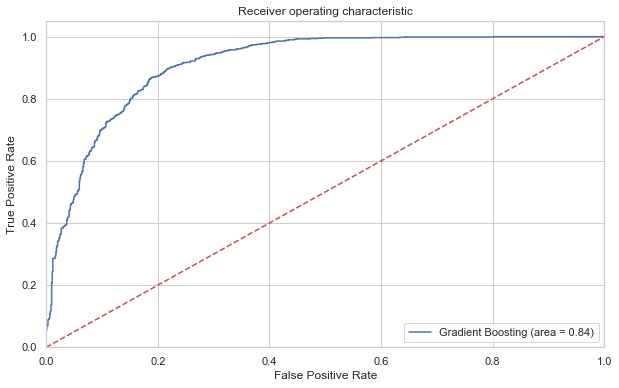

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
gb_roc_auc = roc_auc_score(y_test, gb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

I would consider the random forest as our final model

# Real time predictions

Finally, the best way to use this model is assigning hit Probability for each track, create segments, and build strategies on top of that. To get the churn probability from our model, utilize the code block below:

In [86]:
data['Prob_to_Hit'] = rf.predict_proba(data[X_train.columns])[:,1]

Our dataset looks like below at the end:

In [87]:
data[['track','artist','Prob_to_Hit']].head(10)

,track,artist,Prob_to_Hit
0,Wild Things,Alessia Cara,0.97
1,Surfboard,Esquivel!,0.02
2,Love Someone,Lukas Graham,0.95
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,0.29
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,0.62
5,Here's To Never Growing Up,Avril Lavigne,0.92
6,Sex Metal Barbie,In This Moment,0.49
7,Helluva Night,Ludacris,0.99
8,Holiday With HH,No Bros,0.03
9,My Last,Big Sean Featuring Chris Brown,0.93


In [88]:
data.to_csv('Prob_to_Hit_10s.csv', index=False, encoding='utf-8')

# Your Turn!

Hopefully, this post gives you a good idea of what a machine learning classification project looks like. As you can see, much of the work is in the data wrangling and the preparation steps, and these procedures consume most of the time spent on machine learning.

Now it’s time to get out there and start exploring and cleaning your data. Try two or three algorithms, and let me know how it goes.

I would be pleased to receive feedback or questions on any of the above.